# LOADING LIBRARIES

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:

#import matplotlib.pyplot as plt
#import numpy as np
import pandas as pd
#import networkx as nx
#import csv
#from sys import stdin
#from networkx.algorithms.community import greedy_modularity_communities
#from networkx.algorithms.community import k_clique_communities
#from networkx.algorithms.community import asyn_lpa_communities
#from networkx.algorithms.community import modularity
#from cdlib import algorithms, readwrite, viz
#from sklearn.manifold import TSNE
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegressionCV
#from sklearn.metrics import accuracy_score
#from gensim.models import Word2Vec
from sklearn import preprocessing
import sklearn.metrics as sk_metrics
#import seaborn as sns

#################
def fixed_metrics(y,y_pred):
    from sklearn import metrics
    import pandas as pd
    import sklearn.metrics as sk_metrics
    

    cm = sk_metrics.confusion_matrix(y, y_pred)

    results_partial = y.copy()
    results_partial=pd.DataFrame(results_partial)
    results_partial["pred"] = y_pred
    results_partial = results_partial[(results_partial.iloc[:,0]<1)]
    
    alfa = sum(results_partial["pred"])/results_partial.shape[0]
    beta = 1
    
    fpr, tpr, thresholds = metrics.roc_curve(y, y_pred, pos_label=1)

    
    TN = cm[0,0]
    FN = cm[1,0]
    TP = cm[1,1]
    FP = cm[0,1]
    
    theta = (TP+FP)/(TP+FN+TN+FP)
    n=FP/(TN+FP)
    #pi = (TP+FN)/(TP+FN+TN+FP)
    c= len(y[(y.iloc[:,0]==1)])/(len(y[(y.iloc[:,0]==1)])+len(y[(y.iloc[:,0]==0)]))
    gamma = TP/(TP+FN)
    if beta-alfa==0:
        gamma_cr = float('inf')
        n_cr = float('inf')
    else:
        gamma_cr = ((beta-alfa)**-1)*((1-alfa)*gamma-(1-beta)*n)
        n_cr = ((beta-alfa)**-1)*((beta*n)-(alfa*gamma))
        
    pi_cr = (c*beta)+((1-c)*alfa)
    ##metrics
    ACC_cr = (pi_cr*gamma_cr) + ((1-pi_cr)*(1-n_cr))
    bacc_cr = (1 + (gamma_cr - n_cr))/2
    f_cr = (2*pi_cr*gamma_cr)/(pi_cr+theta)
    mcc_cr = (pi_cr*(1-pi_cr)/theta*(1-theta))*(gamma_cr-n_cr)
    
    auc_r = metrics.auc(fpr, tpr)
    auc_cr = (auc_r-(1-(beta-alfa)))/(beta-alfa)
    alfa = sum(results_partial["pred"])/results_partial.shape[0]
    
    metrics_df =[[auc_r,auc_cr,ACC_cr,bacc_cr,f_cr,mcc_cr,alfa]]
    return(metrics_df)


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

In [3]:
filename = "D:/TESIS_PHD/RICENETPPI/WEIGHTED/out_pred_JJG.csv"
#filename = "/users/ccsosaa/pecanpy/BIG_COMP_W.emb"
data = pd.read_csv(filename,index_col=0)
#print(data)

# threshold svm


In [4]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(data["1"], data["prob_svm"])

Best Threshold=1.586873, G-Mean=0.000


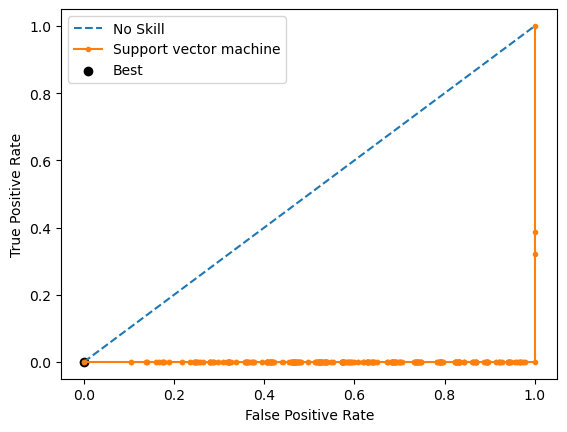

In [5]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Support vector machine')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [6]:
for i in range(len(data["pred_svm"])):
    if data["prob_svm"][i] > thresholds[ix]:
        data["pred_svm"][i] = 1
    else:
        data["pred_svm"][i] = 0


C:\Users\cami_\AppData\Local\Temp\ipykernel_25752\3173681702.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_svm"][i] = 0


In [7]:
y = data["1"]
y = y.to_frame()
y_pred = data["pred_svm"]
y_pred = y_pred.to_frame()
fixed_SVM = fixed_metrics(y,y_pred)
print("AUC","AUCcr","ACCURACY","B_ACCURACY","F","MCC","ALPHA")
print(fixed_SVM)

AUC AUCcr ACCURACY B_ACCURACY F MCC ALPHA
[[0.5, 0.5, 0.9964012073368934, 0.5, 0.0, nan, 0.0]]


C:\Users\cami_\AppData\Local\Temp\ipykernel_25752\835000598.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  mcc_cr = (pi_cr*(1-pi_cr)/theta*(1-theta))*(gamma_cr-n_cr)
C:\Users\cami_\AppData\Local\Temp\ipykernel_25752\835000598.py:68: RuntimeWarning: invalid value encountered in double_scalars
  mcc_cr = (pi_cr*(1-pi_cr)/theta*(1-theta))*(gamma_cr-n_cr)


### precision - recall svm

Best Threshold=0.056664, F-Score=nan


C:\Users\cami_\AppData\Local\Temp\ipykernel_25752\3785998188.py:2: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)


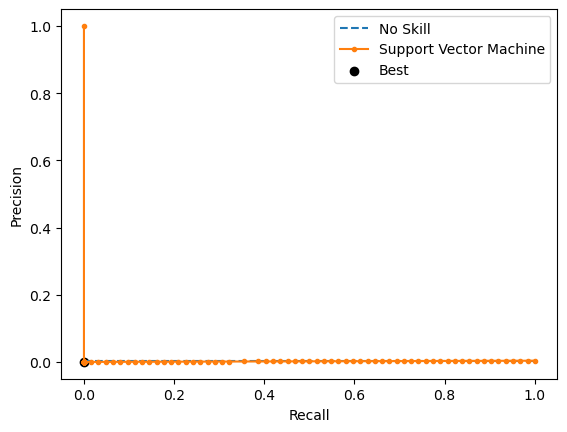

In [8]:
precision, recall, thresholds = precision_recall_curve(y,data["prob_svm"])
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(data["1"][data["1"]==1]) / len(data["1"])
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Support Vector Machine')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [9]:
data["pred_svm_PR"] = data["pred_svm"] #This works. This will create a new column with None type

for i in range(len(data["pred_svm_PR"])):
    if data["prob_svm"][i] > thresholds[ix]:
        data["pred_svm_PR"][i] = 1
    else:
        data["pred_svm_PR"][i] = 0


C:\Users\cami_\AppData\Local\Temp\ipykernel_25752\3623747060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_svm_PR"][i] = 1
C:\Users\cami_\AppData\Local\Temp\ipykernel_25752\3623747060.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_svm_PR"][i] = 0


In [10]:
y = data["1"]
y = y.to_frame()
y_pred = data["pred_svm_PR"]
y_pred = y_pred.to_frame()
fixed_SVM = fixed_metrics(y,y_pred)
print("AUC","AUCcr","ACCURACY","B_ACCURACY","F","MCC","ALPHA")
print(fixed_SVM)

AUC AUCcr ACCURACY B_ACCURACY F MCC ALPHA
[[2.9127344751245232e-05, -17164.500000004267, -0.9962851172518844, -8582.000000002134, 0.0, -0.0036566254447615294, 0.9999417453104975]]


# threshold lda


In [11]:
fpr, tpr, thresholds = roc_curve(data["1"], data["prob_lda"])

Best Threshold=0.844104, G-Mean=1.000


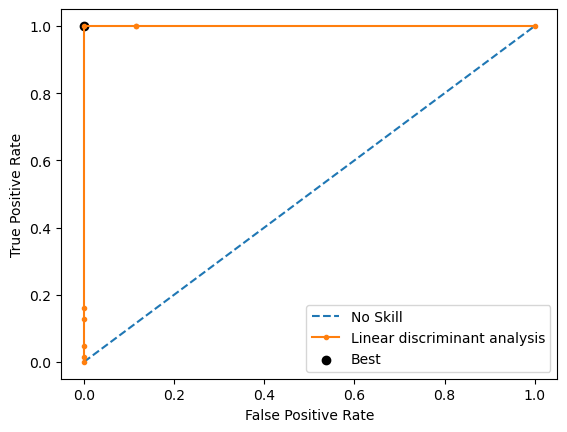

In [12]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Linear discriminant analysis')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [13]:
for i in range(len(data["pred_lda"])):
    if data["prob_lda"][i] > thresholds[ix]:
        data["pred_lda"][i] = 1
    else:
        data["pred_lda"][i] = 0


C:\Users\cami_\AppData\Local\Temp\ipykernel_25752\3037855831.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_lda"][i] = 0
C:\Users\cami_\AppData\Local\Temp\ipykernel_25752\3037855831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_lda"][i] = 1


In [14]:
y = data["1"]
y = y.to_frame()
y_pred = data["pred_lda"]
y_pred = y_pred.to_frame()
fixed_LDA = fixed_metrics(y,y_pred)
print("AUC","AUCcr","ACCURACY","B_ACCURACY","F","MCC","ALPHA")
print(fixed_LDA)

AUC AUCcr ACCURACY B_ACCURACY F MCC ALPHA
[[0.9919354838709677, 0.9919354838709677, 0.9999419549570466, 0.9919354838709677, 0.991869918699187, 0.9928732021332975, 0.0]]


### precision - recall lda

Best Threshold=0.844104, F-Score=1.000


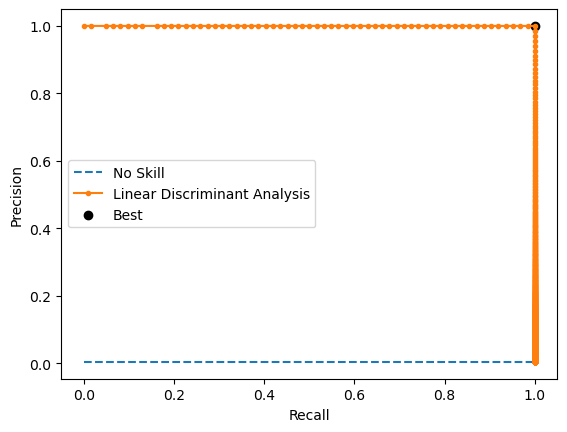

In [15]:
precision, recall, thresholds = precision_recall_curve(y,data["prob_lda"])
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(data["1"][data["1"]==1]) / len(data["1"])
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Linear Discriminant Analysis')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [16]:
data["pred_lda_PR"] = data["pred_lda"] #This works. This will create a new column with None type

for i in range(len(data["pred_lda_PR"])):
    if data["prob_lda"][i] > thresholds[ix]:
        data["pred_lda_PR"][i] = 1
    else:
        data["pred_lda_PR"][i] = 0


C:\Users\cami_\AppData\Local\Temp\ipykernel_25752\2135350384.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_lda_PR"][i] = 0
C:\Users\cami_\AppData\Local\Temp\ipykernel_25752\2135350384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_lda_PR"][i] = 1


In [17]:
y = data["1"]
y = y.to_frame()
y_pred = data["pred_lda_PR"]
y_pred = y_pred.to_frame()
fixed_SVM = fixed_metrics(y,y_pred)
print("AUC","AUCcr","ACCURACY","B_ACCURACY","F","MCC","ALPHA")
print(fixed_SVM)

AUC AUCcr ACCURACY B_ACCURACY F MCC ALPHA
[[0.9919354838709677, 0.9919354838709677, 0.9999419549570466, 0.9919354838709677, 0.991869918699187, 0.9928732021332975, 0.0]]


# threshold rf


In [18]:
fpr, tpr, thresholds = roc_curve(data["1"], data["prob_rf"])

Best Threshold=0.756867, G-Mean=1.000


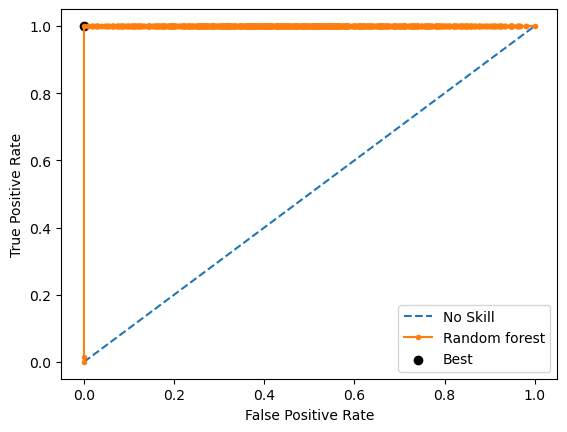

In [19]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Random forest')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [20]:
for i in range(len(data["pred_rf"])):
    if data["prob_rf"][i] > thresholds[ix]:
        data["pred_rf"][i] = 1
    else:
        data["pred_rf"][i] = 0


C:\Users\cami_\AppData\Local\Temp\ipykernel_25752\2461324133.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_rf"][i] = 0
C:\Users\cami_\AppData\Local\Temp\ipykernel_25752\2461324133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_rf"][i] = 1


In [21]:
y = data["1"]
y = y.to_frame()
y_pred = data["pred_rf"]
y_pred = y_pred.to_frame()
fixed_RF= fixed_metrics(y,y_pred)
print("AUC","AUCcr","ACCURACY","B_ACCURACY","F","MCC","ALPHA")
print(fixed_RF)

AUC AUCcr ACCURACY B_ACCURACY F MCC ALPHA
[[0.9919354838709677, 0.9919354838709677, 0.9999419549570466, 0.9919354838709677, 0.991869918699187, 0.9928732021332975, 0.0]]


### precision - recall rf

Best Threshold=0.756867, F-Score=1.000


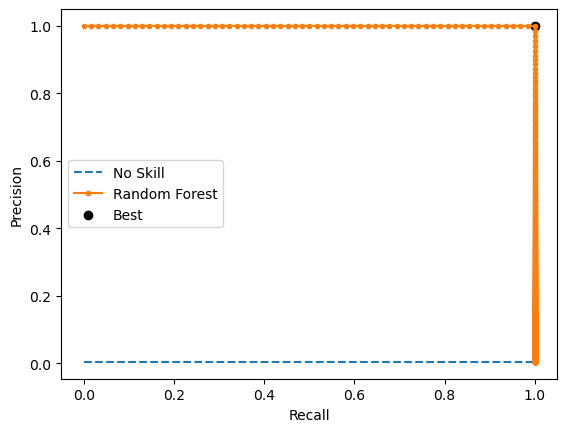

In [22]:
precision, recall, thresholds = precision_recall_curve(y,data["prob_rf"])
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(data["1"][data["1"]==1]) / len(data["1"])
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Random Forest')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [23]:
data["pred_rf_PR"] = data["pred_rf"] #This works. This will create a new column with None type

for i in range(len(data["pred_rf_PR"])):
    if data["prob_rf"][i] > thresholds[ix]:
        data["pred_rf_PR"][i] = 1
    else:
        data["pred_rf_PR"][i] = 0


C:\Users\cami_\AppData\Local\Temp\ipykernel_25752\1760177381.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_rf_PR"][i] = 0
C:\Users\cami_\AppData\Local\Temp\ipykernel_25752\1760177381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_rf_PR"][i] = 1


In [24]:
y = data["1"]
y = y.to_frame()
y_pred = data["pred_rf_PR"]
y_pred = y_pred.to_frame()
fixed_SVM = fixed_metrics(y,y_pred)
print("AUC","AUCcr","ACCURACY","B_ACCURACY","F","MCC","ALPHA")
print(fixed_SVM)

AUC AUCcr ACCURACY B_ACCURACY F MCC ALPHA
[[0.9919354838709677, 0.9919354838709677, 0.9999419549570466, 0.9919354838709677, 0.991869918699187, 0.9928732021332975, 0.0]]


# SAVING RESULTS

In [ ]:
#y_pred

In [25]:
results = data[["1","prob_lda","pred_lda","pred_lda_PR","prob_rf","pred_rf","pred_rf_PR"]]

In [26]:
results.to_csv("D:/REPO_GITHUB/ALUMINUM_GENES_CLASSIFICATION/RESULTS/WEIGHTED/out_pred_JJG.csv")